In [6]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [7]:
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [8]:
train = pd.read_csv('/content/train_E6oV3lV.csv')
test = pd.read_csv('/content/test_tweets_anuFYb8.csv')

In [9]:
print(train.head())
print(test.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [10]:
train[train['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [11]:
train[train['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
train['label'].value_counts()

,count
label,
0,29720
1,2242


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

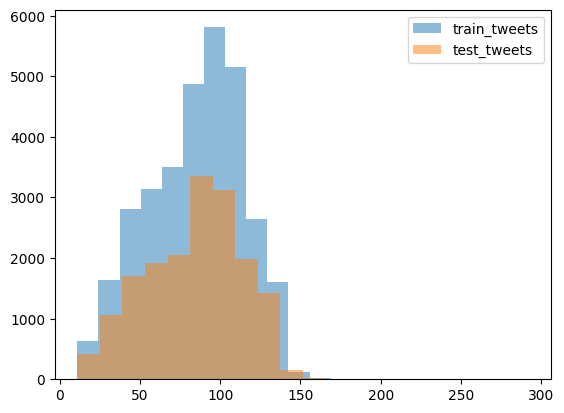

In [13]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, alpha=0.5, label='train_tweets')
plt.hist(length_test, bins=20, alpha=0.5, label='test_tweets')
plt.legend()
plt

# Data Cleaning

## Before cleaning let's combine train and test dataset for make it convinient for us to process the data

In [14]:
combine = pd.concat([train, test], ignore_index=True)
combine

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


## To remove unwanted text_pattern from tweets

In [15]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word, "", input_txt)
  return input_txt

### Removing Twitter Handles(@user)

In [16]:
combine['clean_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

In [17]:
combine.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### Removing punctuation , numbers and special character

In [18]:
combine['clean_tweet'] = combine['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
combine.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### Removing Short Words

In [19]:
combine['clean_tweet'] = combine['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

### Text Normalization

In [20]:
tokenized_tweet = combine['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


# Data Visualization

(-0.5, 799.5, 499.5, -0.5)

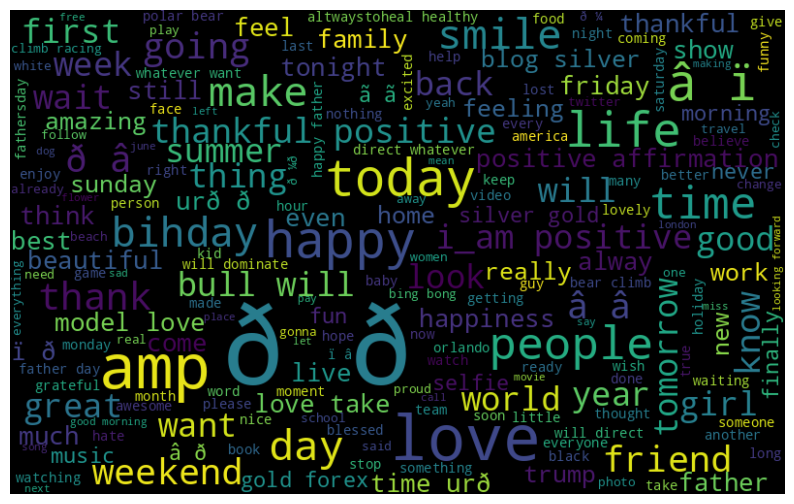

In [21]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in combine['clean_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

### Non Recist or Sexist tweets

(-0.5, 799.5, 499.5, -0.5)

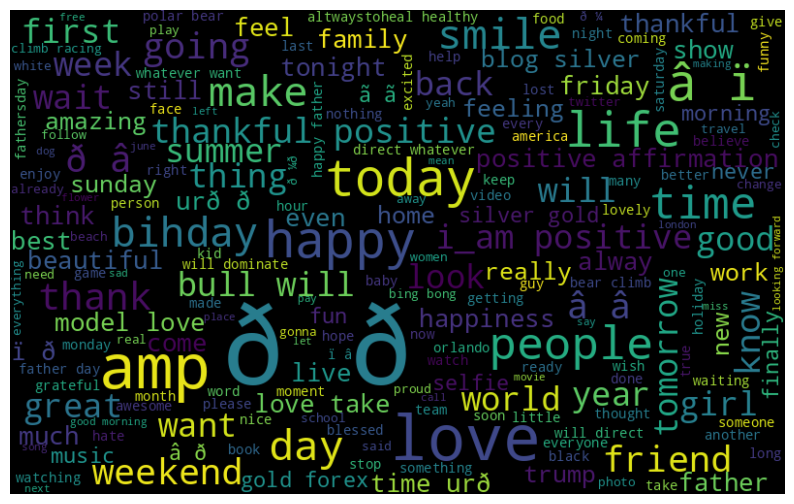

In [22]:
normal_words = ' '.join([text for text in combine['clean_tweet'][combine['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

### Recist or sexist tweets

(-0.5, 799.5, 499.5, -0.5)

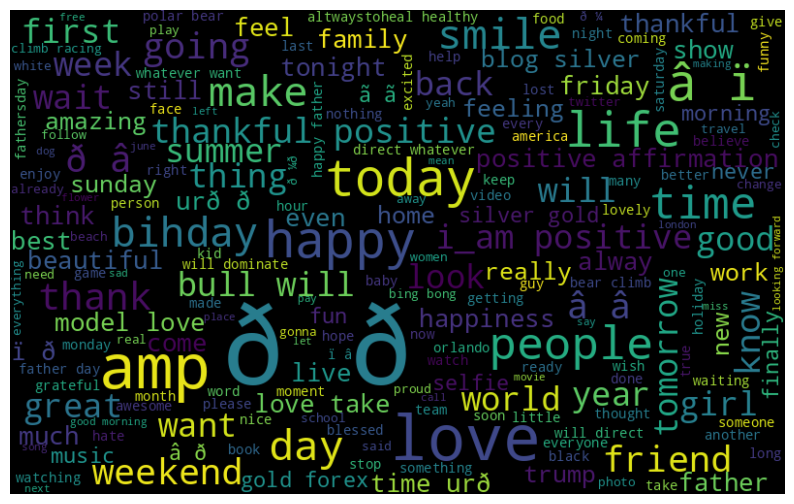

In [23]:
negative_words = ' '.join([text for text in combine['clean_tweet'][combine['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [24]:
# Function to collect hashtag
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
  return hashtags
#

In [25]:
#Extracting hashtag from non sexist tweets
HT_regular = hashtag_extract(combine['clean_tweet'][combine['label'] == 0])

#Extracting hashtag from sexist tweets
HT_negative = hashtag_extract(combine['clean_tweet'][combine['label'] == 1])

In [26]:
#Unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])


In [30]:
# Apply the hashtag_extract function to each element in the Series
combine['hashtags'] = combine['clean_tweet'].apply(hashtag_extract)

### Plot Non sexist Tweets

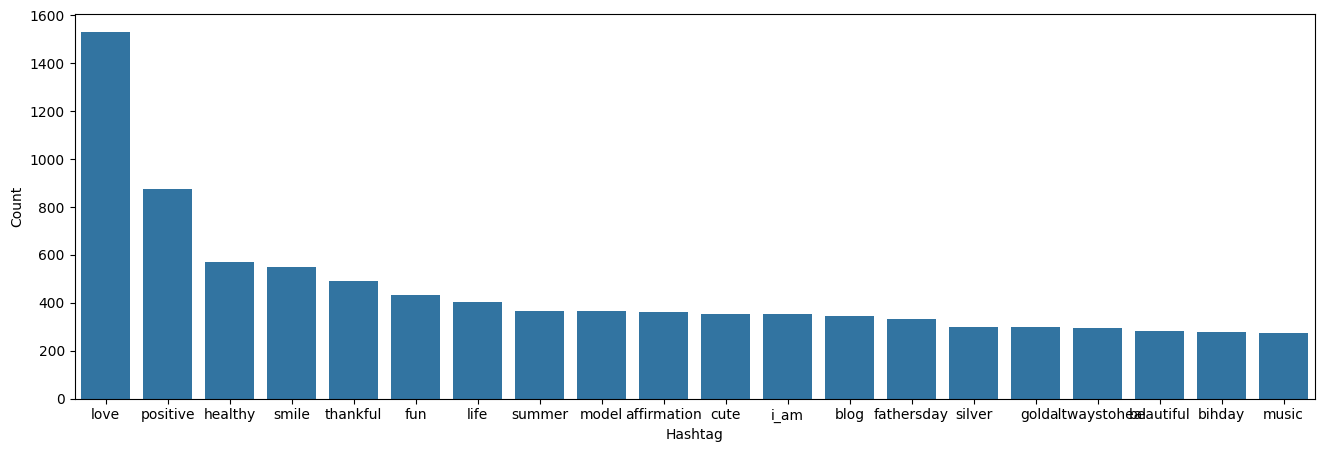

In [37]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")

### Plot Sexist Tweets

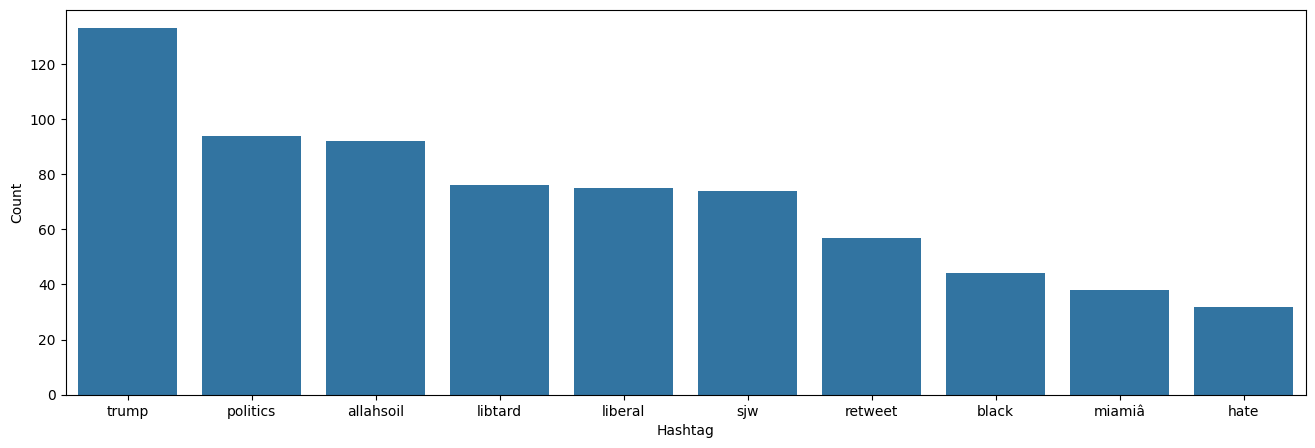

In [40]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

# Bag of Words Feature

In [83]:
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer

bow_vectorizer  = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['clean_tweet'])
bow

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 169919 stored elements in Compressed Sparse Row format>

# TF-IDF Fratures

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combine['clean_tweet'])
tfidf

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 169919 stored elements in Compressed Sparse Row format>

# Word2Vec Feature

In [49]:
!pip install gensim

In [54]:
from gensim.models import Word2Vec # Import the Word2Vec class from gensim.models

# Use 'vector_size' instead of 'size' for specifying the dimensionality of the word vectors
model_w2v = Word2Vec(tokenized_tweet, vector_size=200, window=5, min_count=2, sg=1, workers=4)
model_w2v.train(tokenized_tweet, total_examples=len(combine['clean_tweet']), epochs=20)

(6667067, 8184140)

In [55]:
model_w2v.wv.most_similar(positive="great")

[('ð\x9f\x91\x8danother', 0.497915655374527),
 ('#invited2jive', 0.4856102466583252),
 ('#competition!', 0.47428348660469055),
 ('jivemap:', 0.4371969997882843),
 ('#hampshire.', 0.43505755066871643),
 ("parents'", 0.4345382750034332),
 ('#simpleshapes', 0.4305696189403534),
 ('memorable', 0.4291349947452545),
 ('#bihdaytreat', 0.425068736076355),
 ('wall!!!"', 0.42348992824554443)]

In [57]:
model_w2v.wv.most_similar(positive="trump")

[('businessman:', 0.6497379541397095),
 ('fraud.', 0.6469207406044006),
 ('phony.', 0.6416499614715576),
 ('suppoer.', 0.6325681805610657),
 ('donald', 0.620008111000061),
 ('sexist.', 0.6178804636001587),
 ('man:', 0.6145051121711731),
 ('politician:', 0.6081994771957397),
 ('churchill', 0.603326141834259),
 ('deepak', 0.5971642136573792)]

In [59]:
model_w2v.wv.most_similar(positive="obama")

[('joins', 0.681199312210083),
 ('paladino', 0.6627579927444458),
 ('â\x80\x9917', 0.6494922637939453),
 ('jackals', 0.647597074508667),
 ('soros', 0.64589524269104),
 ('ally,', 0.6377252340316772),
 ('looseâ\x80\x99', 0.6374589204788208),
 ('#p21', 0.637393593788147),
 ('shuts', 0.6341439485549927),
 ('#fyi', 0.6334514021873474)]

#### From the above examples , we can see that our model finds the most similar word for a given word

In [58]:
# Lets check the vector representation of any word

model_w2v.wv['great']

array([ 0.1500507 ,  0.4819821 ,  0.10332584,  0.066091  ,  0.98947495,
        0.12845622, -0.7296025 ,  0.38908204, -0.9986081 ,  0.07904691,
        0.03258681, -0.22198717, -0.4716902 ,  0.7083176 ,  0.76894236,
       -0.17984796, -0.44830844, -0.00258045,  0.12930547,  0.27029905,
        0.53784174, -0.16946563,  1.5858387 , -0.09612481,  0.5438979 ,
        0.12409149, -0.3402426 ,  0.07137962, -0.31829056, -0.36903715,
        0.7067355 , -0.14530136,  0.05435912,  0.24007261, -0.00772038,
       -0.5424311 ,  0.41352454, -0.05999385, -0.06282475, -0.43199018,
       -1.4343715 ,  0.42868385, -0.9813655 , -0.9560145 , -0.18890572,
        0.06888352, -0.0929424 ,  0.6128083 ,  0.5290648 , -0.36557883,
       -0.04647292, -0.6157999 , -0.20437044, -0.55794996,  0.85896176,
        0.04361479,  0.28285044, -1.4707148 ,  0.26262414, -0.75109076,
       -0.49928388, -0.03766316, -0.35957736,  0.16064578, -0.06322381,
       -0.42978778, -0.3602107 ,  0.05762241, -0.8926818 ,  1.30

# Logistic Regression

In [60]:
bow.shape

(49159, 1000)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

### Try the Logistic Regression model on different Feature

1.   BOW feature
2.   TF-IDF feature



In [62]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [63]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [68]:
logisticreg = LogisticRegression()
logisticreg.fit(x_train_bow, y_train_bow)

LogisticRegression()

In [70]:
prediction_bow = logisticreg.predict(x_valid_bow)
f1_score(y_valid_bow, prediction_bow)

0.4659206510681587

In [87]:
test_pred_bow = logisticreg.predict(bow[31962:,:])
test['label'] = test_pred_bow
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False)

In [72]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)

In [73]:
logisticreg.fit(x_train_tfidf, y_train_tfidf)
prediction_tfidf = logisticreg.predict(x_valid_tfidf)
f1_score(y_valid_tfidf, prediction_tfidf)

0.4364406779661017

# SVM  - Support Vector Machine

In [76]:
from sklearn import svm

### Try the Support vector Mchine model on different Feature

1.   BOW feature
2.   TF-IDF feature:

In [77]:
svm_bow = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_bow.fit(x_train_bow, y_train_bow)
prediction_bow = svm_bow.predict(x_valid_bow)
f1_score(y_valid_bow, prediction_bow)

0.4741035856573706

In [86]:
# Calculate predictions for the test set, ensuring the correct number of data points
test_pred_bow = svm_bow.predict(bow[31962:,:])  # Predict on the portion of 'bow' corresponding to the test set

# Assign predictions to the 'label' column in the 'test' DataFrame
test['label'] = test_pred_bow

# Create submission DataFrame
submission = test[['id','label']]

# Save submission to CSV
submission.to_csv('sub_svm_bow.csv', index=False)

In [88]:
svm_tfidf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_tfidf.fit(x_train_tfidf, y_train_tfidf)
prediction_tfidf = svm_tfidf.predict(x_valid_tfidf)
f1_score(y_valid_tfidf, prediction_tfidf)

0.4387229660144181

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

### Try the Random Forest model on different Feature

1.   BOW feature
2.   TF-IDF feature:

In [101]:
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bow.fit(x_train_bow, y_train_bow)
prediction_bow = rf_bow.predict(x_valid_bow)
f1_score(y_valid_bow, prediction_bow)

0.5036319612590798

In [102]:
test_pred_bow = rc_bow.predict(bow[31962:,:])
test['label'] = test_pred_bow
submission = test[['id','label']]
submission.to_csv('sub_rc_bow.csv', index=False)

In [105]:
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(x_train_tfidf, y_train_tfidf)
prediction_tfidf = rf_tfidf.predict(x_valid_tfidf)
f1_score(y_valid_tfidf, prediction_tfidf)

0.5160680529300568

# XGBoost Classifier

In [106]:
from xgboost import XGBClassifier

In [107]:
xgb_bow = XGBClassifier(n_estimators=100, random_state=42)
xgb_bow.fit(x_train_bow, y_train_bow)
prediction_bow = xgb_bow.predict(x_valid_bow)
f1_score(y_valid_bow, prediction_bow)

0.4474226804123711

In [108]:
test_pred_bow = xgb_bow.predict(bow[31962:,:])
test['label'] = test_pred_bow
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

In [109]:
xgb_tfidf = XGBClassifier(n_estimators=100, random_state=42)
xgb_tfidf.fit(x_train_tfidf, y_train_tfidf)
prediction_tfidf = xgb_tfidf.predict(x_valid_tfidf)
f1_score(y_valid_tfidf, prediction_tfidf)

0.4593202883625129